<h1 align="center" style="font-weight:bold">AtliQo Bank Credit Card Launch</h1>

### **Problem Statement**

*AtilQo*, a newly launched bank, is introducing its first credit card and aims to identify the ideal target market based on customer demographics and financial behavior. To evaluate the effectiveness of the new credit card offering, the bank will conduct an A/B test to determine whether the average transaction amount among customers in the identified target market is significantly higher compared to a control group. The objective is to assess whether the new credit card drives greater spending behavior, thereby informing decisions on broader implementation and targeted marketing strategies.


<h2 align="center" style="font-weight:bold">Phase 1: Target Market Identification</h2>

In [1]:
# Import data and dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_cust = pd.read_csv('Resource/datasets/customers.csv')

In [3]:
df_cs = pd.read_csv('Resource/datasets/credit_profiles.csv')

In [4]:
df_txn = pd.read_csv('Resource/datasets/transactions.csv')

In [5]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [6]:
df_cust.shape

(1000, 8)

In [7]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [8]:
df_cs.shape

(1004, 6)

In [9]:
df_txn.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [10]:
df_txn.shape

(500000, 7)

### **Data Cleaning**

#### **Exploring `customer` table**

In [11]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [12]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [13]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


#### **Analyzing `annual_income` Column**

 **Null Value Treatment**

In [14]:
df_cust['annual_income'].median()

112218.5

In [15]:
cols = df_cust['occupation'].unique()

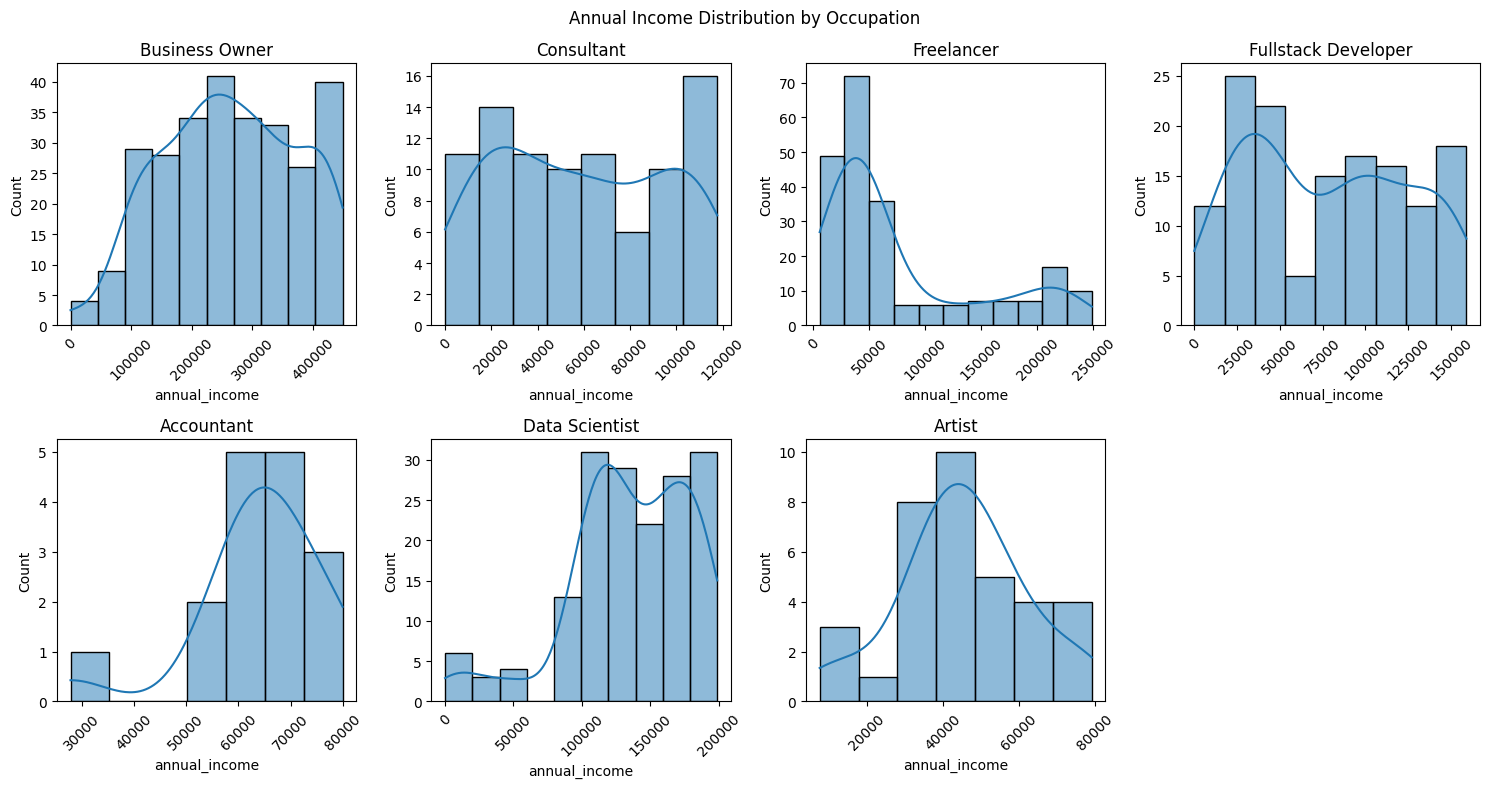

In [16]:
plt.rcParams['figure.figsize']=[15,8]
for i,col in enumerate(cols,1):
    plt.subplot(2,4,i)
    data=df_cust[df_cust['occupation']==col]['annual_income']
    sns.histplot(data,kde=1)
    plt.title(col)
    plt.xticks(rotation=45)
plt.suptitle('Annual Income Distribution by Occupation')
plt.tight_layout()
plt.show()

In [17]:
for col in cols:
    skew_value = df_cust[df_cust['occupation'] == col]['annual_income'].skew()
    print(f"Skewness for {col}: {skew_value:.2f}")

Skewness for Business Owner: -0.10
Skewness for Consultant: 0.08
Skewness for Freelancer: 1.19
Skewness for Fullstack Developer: 0.15
Skewness for Accountant: -1.69
Skewness for Data Scientist: -0.95
Skewness for Artist: -0.12


In [18]:
occ_inc_median=df_cust.groupby('occupation')['annual_income'].median().sort_values(ascending=False)
occ_inc_median

occupation
Business Owner         261191.5
Data Scientist         135759.0
Fullstack Developer     76774.0
Accountant              65265.0
Consultant              58017.0
Freelancer              46759.0
Artist                  45794.0
Name: annual_income, dtype: float64

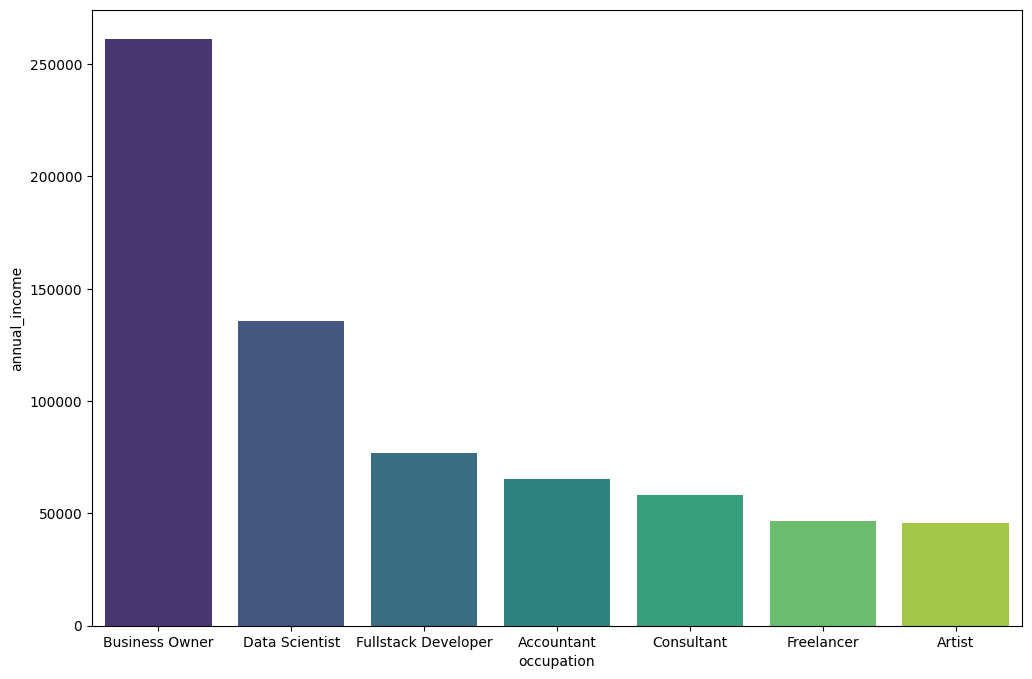

In [19]:
plt.rcParams['figure.figsize']=[12,8]
sns.barplot(occ_inc_median,palette='viridis')
plt.show()

In [20]:
df_cust['annual_income']=df_cust['annual_income'].fillna(df_cust['occupation'].map(occ_inc_median))

Imputed missing annual income values using the median per occupation, given the skewed distributions—most notably for Freelancer (1.19), Accountant (-1.69), and Data Scientist (-0.95).

In [21]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

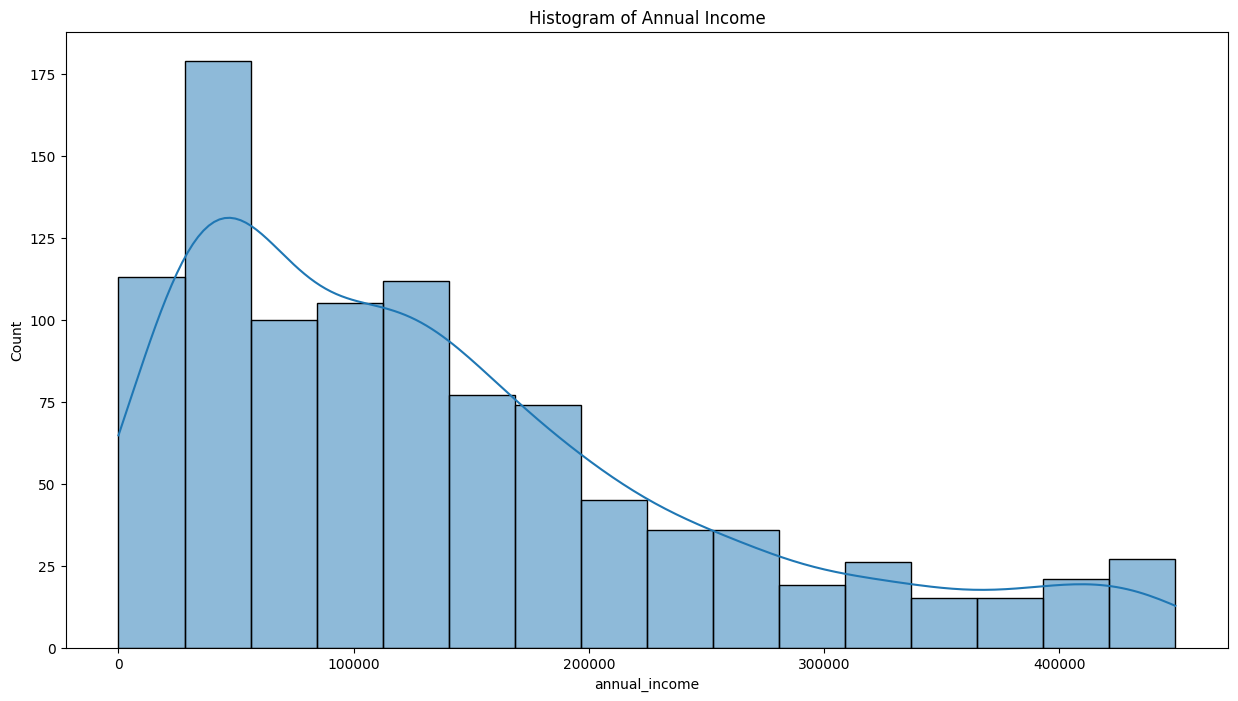

In [22]:
plt.rcParams['figure.figsize']=[15,8]
sns.histplot(df_cust['annual_income'],kde=True)
plt.title('Histogram of Annual Income')
plt.show()

**Outlier Treatement** 

In [23]:
# Replace annual_income < 100 with occupation median from occ_inc_median
df_cust.loc[df_cust['annual_income'] < 100, 'annual_income'] = df_cust['occupation'].map(occ_inc_median)

In [24]:
df_cust[df_cust['annual_income']<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


As a business decision, annual incomes below \$100 were deemed flawed and have been replaced with the median income for the respective occupation.

 **Visualization** 

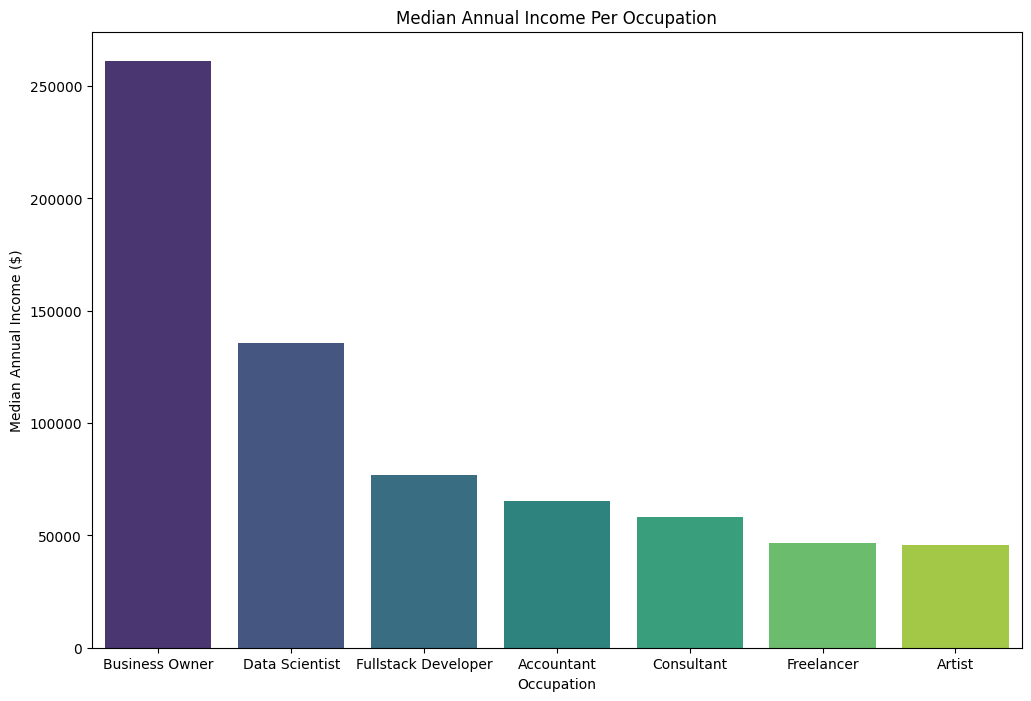

In [25]:
plt.rcParams['figure.figsize']=[12,8]
sns.barplot(occ_inc_median,palette='viridis')
plt.title('Median Annual Income Per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Median Annual Income ($)')
plt.show()

In [26]:
categorical_columns = ['gender', 'location', 'occupation', 'marital_status']

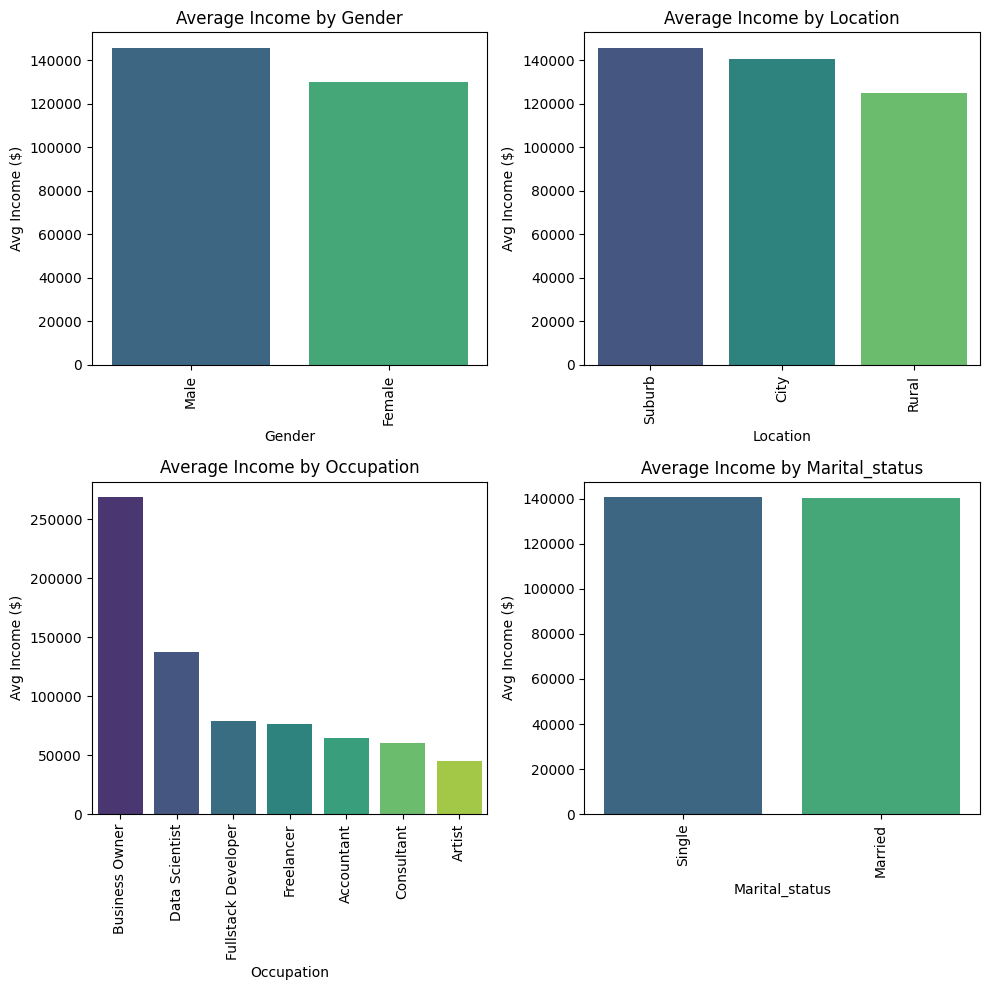

In [27]:
plt.rcParams['figure.figsize']=[10,10]
for idx, col in enumerate(categorical_columns,1):
    plt.subplot(2,2,idx)
    avg_income_grp=df_cust.groupby(col)['annual_income'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_income_grp.index,y=avg_income_grp.values,palette='viridis')
    plt.title(f'Average Income by {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Avg Income ($)')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### **Analyzing `age` Column**

In [28]:
df_cust['age'].isnull().sum()

0

**Outlier Treatment**

In [29]:
df_cust['age'].describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

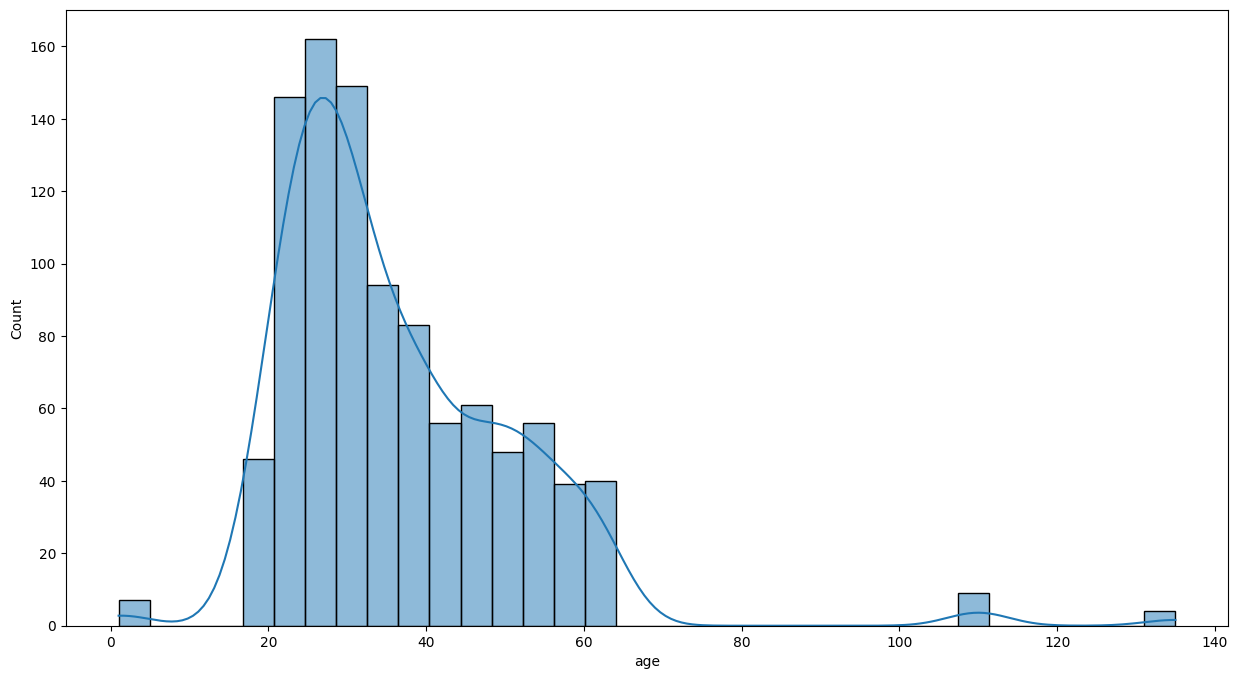

In [30]:
plt.rcParams['figure.figsize']=[15,8]
sns.histplot(df_cust['age'],kde=1)
plt.show()

A person's age is considered valid **only** if it falls within the inclusive range of **15 to 80 years**. Any age below 15 or above 80 is deemed **invalid** for the purpose of this business rule.

In [31]:
df_cust[(df_cust['age']<15) | (df_cust['age']>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [32]:
occ_age_median = (
    df_cust[(df_cust['age'] >= 15) & (df_cust['age'] <= 80)]
    .groupby('occupation')['age']
    .median()
)
occ_age_median

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.0
Name: age, dtype: float64

In [33]:
df_cust.loc[(df_cust['age'] < 15) | (df_cust['age'] > 80), 'age'] = df_cust['occupation'].map(occ_age_median)   

Age values deemed invalid were replaced with the median age for each occupation.
This approach ensured consistency while retaining occupation-based age patterns.
For example, Freelancers had a median age of 24, while Business Owners had 51.

In [34]:
df_cust[(df_cust['age']<15) | (df_cust['age']>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [35]:
df_cust['age'].describe()

count    1000.000000
mean       35.540000
std        12.277648
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

 **Visualization** 

In [36]:
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married
...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married
996,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single
997,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married
998,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married


In [37]:
bins=[17,25,48,65]
bin_labels=['18-25','26-48','49-65']

In [38]:
df_cust['age_group']=pd.cut(df_cust['age'],bins=bins,labels=bin_labels)

In [39]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [40]:
pie_data=df_cust['age_group'].value_counts(normalize=True)*100
pie_data

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

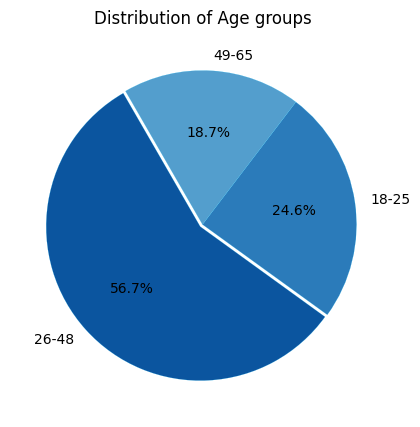

In [41]:
plt.rcParams['figure.figsize']=[6,5]
plt.pie(pie_data,labels=pie_data.index,autopct='%1.1f%%',
        startangle=120,explode=[0.02,0,0],
        colors=sns.color_palette('Blues_r'),
        wedgeprops={'edgecolor': 'deepskyblue','linewidth':0.1})
plt.title('Distribution of Age groups')
plt.show()

In [42]:
cust_loc_gen=df_cust.groupby(['location','gender']).size().unstack()
cust_loc_gen

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


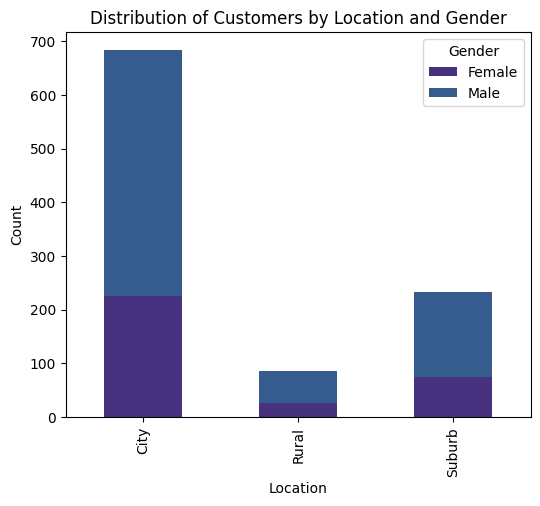

In [43]:
plt.rcParams['figure.figsize']=[6,5]
cust_loc_gen.plot(kind='bar',stacked=True, color=sns.color_palette('viridis'))
plt.title('Distribution of Customers by Location and Gender')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [44]:
df_cust.to_csv('cust_cleaned.csv', index=False)

#### **Exploring `credit_score` table**

In [45]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [46]:
df_cs.shape # potential duplicates since there are only 1000 customers

(1004, 6)

In [47]:
df_cust.shape

(1000, 9)

In [48]:
df_cs['cust_id'].nunique()

1000

In [49]:
df_cs['cust_id'].duplicated().sum()

4

In [50]:
df_cs[df_cs['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [51]:
df_cs_clean_1=df_cs.drop_duplicates(subset='cust_id',keep='last').reset_index(drop=True)

In [52]:
df_cs_clean_1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [53]:
df_cs_clean_1.shape # removed duplicates

(1000, 6)

**Checking NULL Values**

In [54]:
df_cs_clean_1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [55]:
df_cs_clean_1[df_cs_clean_1['credit_limit'].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
908,909,479,0.487555,320.0,3.0,NaN
927,928,311,0.832244,316.0,2.0,NaN
944,945,526,0.272734,227.0,1.0,NaN
950,951,513,0.175914,131.0,3.0,NaN


In [56]:
df_cs_clean_1['credit_limit'].value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

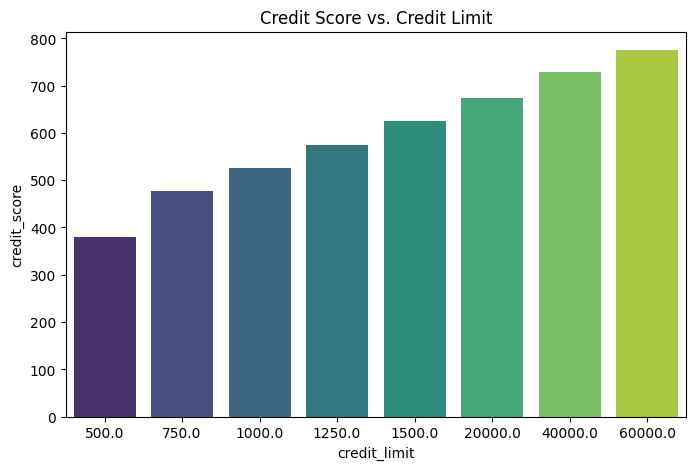

In [57]:
plt.rcParams['figure.figsize']=[8,5]
sns.barplot(df_cs_clean_1,x='credit_limit',y='credit_score',ci=0,palette='viridis')
plt.title('Credit Score vs. Credit Limit')
plt.show()

The data reveals a strong linear relationship between credit score and credit limit—higher credit scores are consistently associated with higher credit limits.

In [58]:
# grouping credit_scores
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800]
bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]
bin_labels

['300-449',
 '450-499',
 '500-549',
 '550-599',
 '600-649',
 '650-699',
 '700-749',
 '750-799']

In [59]:
df_cs_clean_1['credit_score_range']=pd.cut(df_cs_clean_1['credit_score'],
                                           bins=bin_ranges,labels=bin_labels,
                                           right=False)

In [60]:
df_cs_clean_1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [61]:
crd_lmt_mode=df_cs_clean_1.groupby('credit_score_range')['credit_limit'].agg(lambda x:x.mode()[0])
crd_lmt_mode

credit_score_range
300-449      500.0
450-499      750.0
500-549     1000.0
550-599     1250.0
600-649     1500.0
650-699    20000.0
700-749    40000.0
750-799    60000.0
Name: credit_limit, dtype: float64

In [62]:
df_cs_clean_1['credit_score_range']=df_cs_clean_1['credit_score_range'].astype(str)

In [63]:
df_cs_clean_1['credit_limit'].fillna(df_cs_clean_1['credit_score_range'].map(crd_lmt_mode),inplace=True)

To address missing values in the credit limit, the data was segmented into bins based on credit score. Within each bin, missing credit limit values were imputed using the mode. Binning was chosen because visual inspection showed that credit limit values tend to repeat within specific score ranges, making mode imputation an effective strategy.

In [64]:
df_cs_clean_1.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
dtype: int64

In [65]:
df_cs_clean_1.shape

(1000, 7)

In [66]:
df_cs_clean_1.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000


The maximum credit limit is 60,000 so an outstanding debt of 209,901 is not possible and likely indicates a data quality issue.

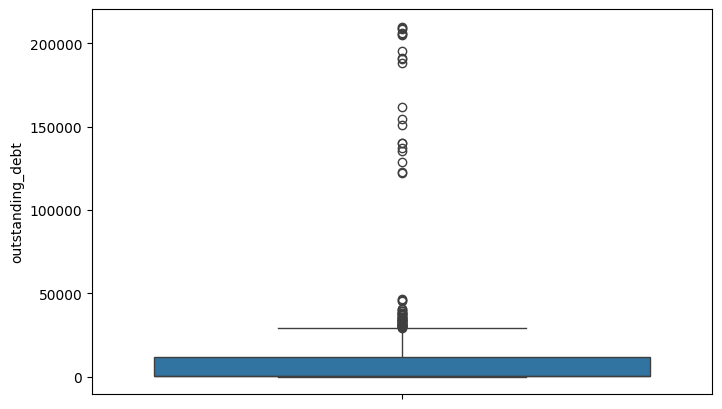

In [67]:
sns.boxplot(df_cs_clean_1['outstanding_debt'])
plt.show()

In [68]:
df_cs_clean_1[df_cs_clean_1['outstanding_debt']>df_cs_clean_1['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
19,20,647,0.439132,205014.0,3.0,1500.0,600-649
25,26,758,0.250811,190838.0,2.0,60000.0,750-799
38,39,734,0.573023,122758.0,3.0,40000.0,700-749
93,94,737,0.739948,137058.0,2.0,40000.0,700-749
204,205,303,0.364360,187849.0,0.0,500.0,300-449
271,272,703,0.446886,154568.0,1.0,40000.0,700-749
301,302,722,0.608076,122402.0,4.0,40000.0,700-749
330,331,799,0.363420,208898.0,4.0,60000.0,750-799
350,351,320,0.285081,150860.0,0.0,500.0,300-449


Outstanding debt exceeding the credit limit is highly improbable and is likely due to data entry errors, reporting anomalies, or system inaccuracies. In standard financial systems, debt cannot surpass the credit limit under normal circumstances, as interest accumulation and fees are unlikely to inflate balances to such extreme levels. Additionally, such discrepancies could indicate unauthorized transactions or other irregularities. To ensure consistency and reliability, we cap the outstanding debt to the credit limit, which represents the maximum allowable liability for a credit line.

In [69]:
df_cs_clean_1.loc[df_cs_clean_1['outstanding_debt'] > df_cs_clean_1['credit_limit'], 'outstanding_debt'] = df_cs_clean_1['credit_limit']     

In [70]:
df_cs_clean_1[df_cs_clean_1['outstanding_debt']>df_cs_clean_1['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range


In [71]:
df_cs_clean_1.to_csv('crd_score_cleaned.csv', index=False)

**Merging customer and credit_score dataframes for analysis**

In [72]:
df_merged=pd.merge(df_cust,df_cs_clean_1,on='cust_id',how='inner')

In [73]:
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749


In [74]:
df_merged.shape

(1000, 15)

In [75]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   cust_id                         1000 non-null   int64   
 1   name                            1000 non-null   object  
 2   gender                          1000 non-null   object  
 3   age                             1000 non-null   float64 
 4   location                        1000 non-null   object  
 5   occupation                      1000 non-null   object  
 6   annual_income                   1000 non-null   float64 
 7   marital_status                  1000 non-null   object  
 8   age_group                       1000 non-null   category
 9   credit_score                    1000 non-null   int64   
 10  credit_utilisation              1000 non-null   float64 
 11  outstanding_debt                1000 non-null   float64 
 12  credit_inquiries_last

In [76]:
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 
                  'annual_income', 'age']

In [77]:
corr_matrix=df_merged[numerical_cols].corr()
corr_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575751,0.444957
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086368,-0.027835
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555661,0.444338
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684775,0.511044
annual_income,0.575751,-0.086368,0.555661,0.684775,1.000000,0.619060
age,0.444957,-0.027835,0.444338,0.511044,0.619060,1.000000


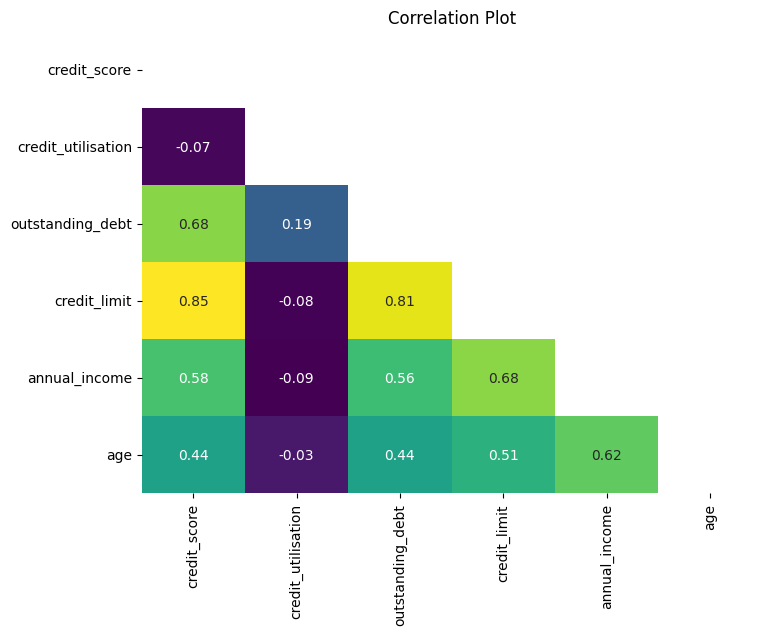

In [78]:
plt.rcParams['figure.figsize']=[8,6]
sns.heatmap(corr_matrix,annot=True,cbar=False,cmap='viridis',fmt='.2f',mask=np.triu(corr_matrix))
plt.title('Correlation Plot')
plt.show()

**Inferences:**

1. **Credit score** strongly correlates with **credit limit** (0.85), **outstanding debt** (0.68), and **annual income** (0.58).
2. **Credit limit** is also highly correlated with **outstanding debt** (0.81) and **annual income** (0.68).
3. **Credit utilisation** shows weak or negative correlation with most variables.
4. **Annual income** moderately correlates with **age** (0.62).
5. **Age** has moderate positive correlation with most variables, excluding **credit utilisation**.
6. **credit\_score** appears to be a key variable, influenced by income, debt, and credit limit.


#### **Exploring `Transactions` table**

In [79]:
df_txn.shape

(500000, 7)

In [80]:
df_txn.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [81]:
df_txn.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [82]:
df_txn['platform'].unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

In [83]:
df_txn['platform'].describe()

count     495059
unique         7
top       Amazon
freq      151443
Name: platform, dtype: object

In [84]:
round(df_txn['platform'].value_counts(normalize=True)*100,2)

platform
Amazon      30.59
Flipkart    24.78
Alibaba     14.86
Meesho      14.80
Shopify      7.96
Cred         5.00
Ebay         2.01
Name: proportion, dtype: float64

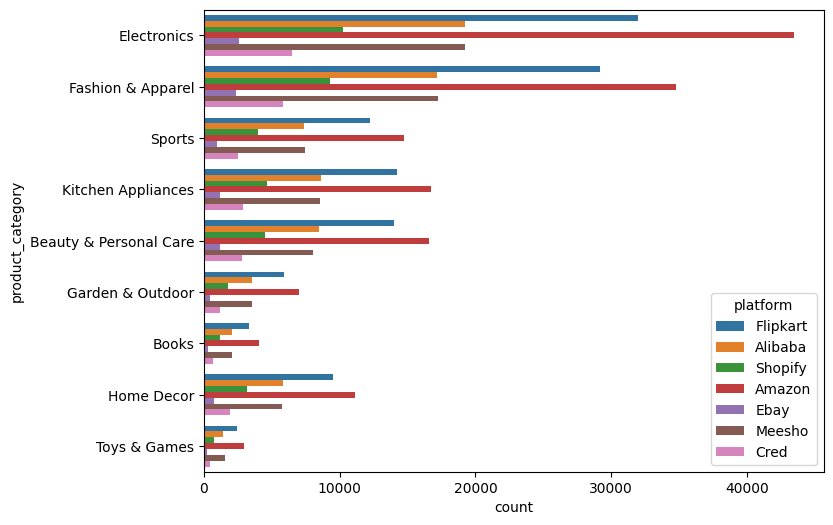

In [85]:
sns.countplot(df_txn,y='product_category',hue='platform')
plt.show()

#### **Null value imputation**

In [86]:
df_txn['platform']=df_txn['platform'].fillna(df_txn['platform'].mode()[0])

The missing values in the 'platform' column were imputed using the mode, as it is a categorical variable. Amazon, being the most frequent platform overall (accounting for 151,443 out of 495,059 records), was chosen as the mode. This choice is further supported by the visual evidence in the chart, which shows that Amazon consistently dominates across multiple product categories. Therefore, imputing with Amazon is both statistically and contextually appropriate.


In [87]:
df_txn.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [88]:
df_txn.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


**Anomalies & Outlier Treatment**

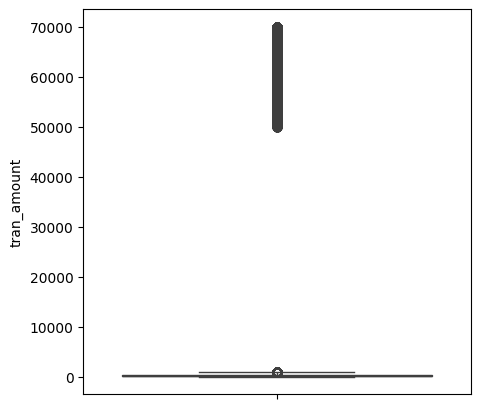

In [89]:
plt.rcParams['figure.figsize']=[5,5]
sns.boxplot(df_txn['tran_amount'])
plt.show()

Extreme outliers were identified using the boxplot, and the `.describe()` summary revealed a minimum transaction amount of 0, which is not realistic. These anomalies indicate potential data quality issues that require correction.


In [90]:
bins = [0, 1000, 70000]
labels = ['(0, 1000]', '(1000, 70000]']

In [91]:
df_txn['amount_bins'] = pd.cut(df_txn['tran_amount'], bins=bins, labels=labels, include_lowest=False)

In [92]:
data = df_txn['amount_bins'].value_counts().sort_index()
data

amount_bins
(0, 1000]        470266
(1000, 70000]     25000
Name: count, dtype: int64

In [93]:
colors = ['#7ba8d8', '#e0a589']

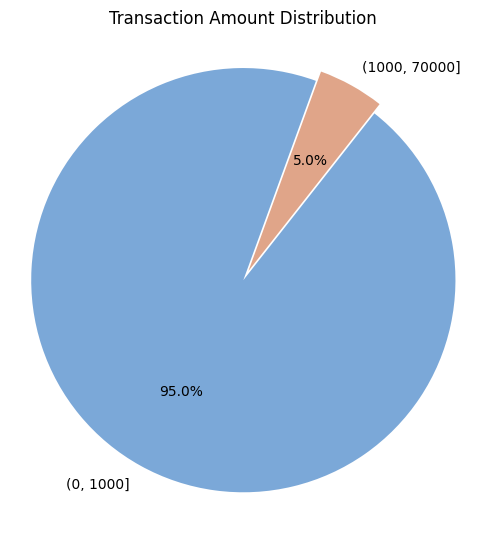

In [94]:
plt.rcParams['figure.figsize']=[5,5.5]
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=70,explode=[0,0.05],colors=colors)
plt.title('Transaction Amount Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [95]:
amt=df_txn[df_txn['tran_amount']>1000].sort_values('tran_amount',ascending=True)

In [96]:
bins = [50000, 55000, 60000, float('inf')]
labels = ['50000-55000', '55000-60000', '60000+']

In [97]:
amt['amt_grp']=pd.cut(amt['tran_amount'], bins=bins, labels=labels, include_lowest=True)

In [98]:
amt_grp_counts = amt['amt_grp'].value_counts()

In [99]:
amt_grp_counts

amt_grp
60000+         12568
55000-60000     6298
50000-55000     6134
Name: count, dtype: int64

In [100]:
colors = ["#FFB347", "#FFDAC1", "#FDFD96"] 

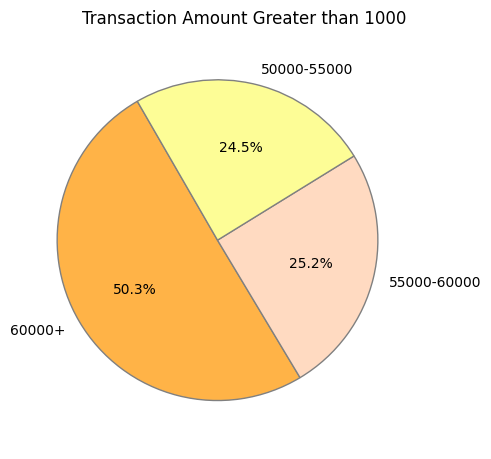

In [101]:
plt.rcParams['figure.figsize']=[5,4.7]
plt.pie(amt_grp_counts, labels=amt_grp_counts.index, 
        autopct='%1.1f%%',startangle=120,
        colors=colors, wedgeprops={'edgecolor': 'grey'})
plt.title('Transaction Amount Greater than 1000',loc='right')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [102]:
df_txn_1=df_txn.copy()

In [103]:
temp = df_txn_1[(df_txn_1['tran_amount'] > 0) & (df_txn_1['tran_amount'] <= 60_000)] 

In [104]:
Q1, Q3 = temp['tran_amount'].quantile([0.25, 0.75])

In [105]:
IQR=Q3-Q1

A multiplier of `2.5` was used to set the upper bound in order to avoid flagging legitimate transactions, as 95% of credit card transactions are below 1000.

In [106]:
lower_bound=Q1-2.5*IQR 
upper_bound=Q3+2.5*IQR
lower_bound,upper_bound

(-693.5, 1124.5)

In [107]:
df_trans_amt_clean=df_txn_1[(df_txn_1['tran_amount']<=upper_bound) & (df_txn_1['tran_amount']!=0)]

In [108]:
df_trans_amt_clean.shape

(470266, 8)

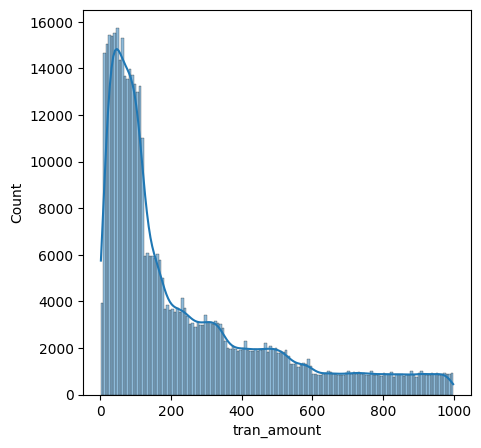

In [109]:
plt.rcParams['figure.figsize']=[5,5]  
sns.histplot(df_trans_amt_clean['tran_amount'],kde=True)
plt.show()

In [110]:
df_trans_amt_clean.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,amount_bins
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe,"(0, 1000]"
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card,"(0, 1000]"
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe,"(0, 1000]"
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay,"(0, 1000]"
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking,"(0, 1000]"


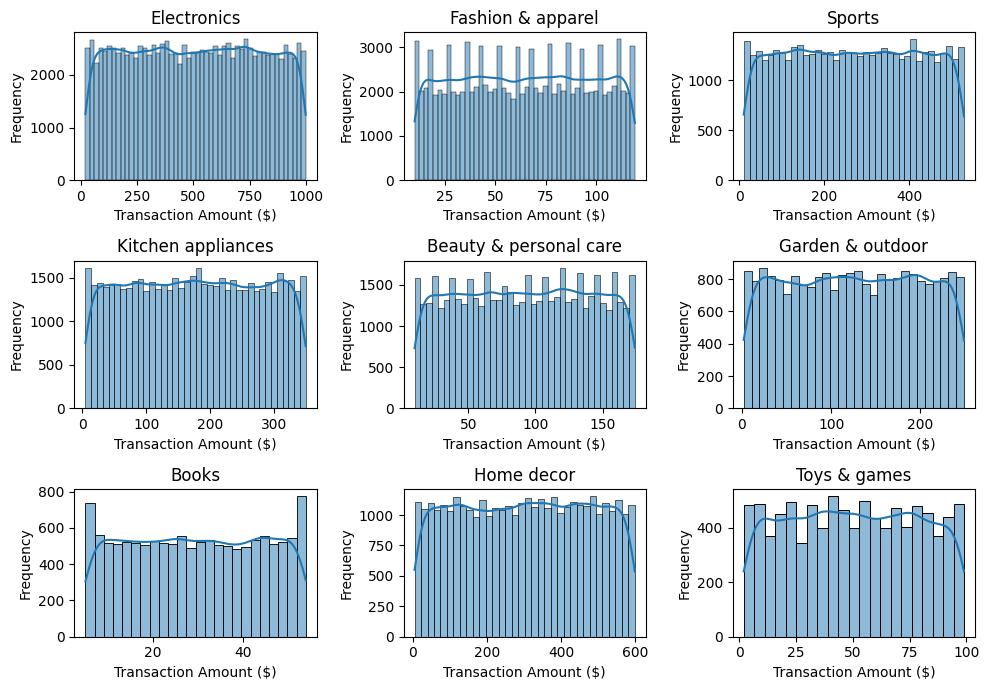

In [111]:
plt.rcParams['figure.figsize']=[10,7]  
categorical_columns = df_trans_amt_clean['product_category'].unique()

for idx, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, idx) 
    subset = df_trans_amt_clean[df_trans_amt_clean['product_category'] == col]['tran_amount']
    sns.histplot(data=subset, kde=True)  
    plt.title(col.capitalize())
    plt.xlabel('Transaction Amount ($)')
    plt.ylabel('Frequency')
plt.tight_layout()

In [112]:
categorical_columns = df_trans_amt_clean['product_category'].unique()

for col in categorical_columns:
    skew_value = df_trans_amt_clean[df_trans_amt_clean['product_category'] == col]['tran_amount'].skew()
    print(f"Skewness for {col}: {skew_value:.2f}")

Skewness for Electronics: 0.00
Skewness for Fashion & Apparel: -0.00
Skewness for Sports: 0.00
Skewness for Kitchen Appliances: 0.00
Skewness for Beauty & Personal Care: -0.01
Skewness for Garden & Outdoor: -0.01
Skewness for Books: -0.00
Skewness for Home Decor: -0.01
Skewness for Toys & Games: 0.01


In [113]:
amt_mean=df_trans_amt_clean.groupby('product_category')['tran_amount'].mean()
amt_mean

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               508.486841
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [114]:
df_txn_2=df_txn_1.copy()

In [115]:
df_txn_2.loc[ df_txn_2['tran_amount']>upper_bound,'tran_amount'] = df_txn_2['product_category'].map(amt_mean)    

In [116]:
df_txn_2[df_txn_2['tran_amount']>upper_bound]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,amount_bins


Outlier transaction amounts exceeding the upper bound were imputed using the mean within each product category.
This was justified by the near-zero skewness across categories, indicating symmetric distributions with no significant outliers.


In [117]:
df_trans_zero = df_txn_2[df_txn_2['tran_amount']==0]
df_trans_zero

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,amount_bins
120,121,440,2023-01-01,0.0,Amazon,Electronics,Credit Card,NaN
141,142,839,2023-01-01,0.0,Amazon,Electronics,Credit Card,NaN
517,518,147,2023-01-01,0.0,Amazon,Electronics,Credit Card,NaN
533,534,891,2023-01-01,0.0,Amazon,Electronics,Credit Card,NaN
586,587,108,2023-01-01,0.0,Amazon,Electronics,Credit Card,NaN
...,...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0.0,Amazon,Electronics,Credit Card,NaN
499494,499495,295,2023-09-05,0.0,Amazon,Electronics,Credit Card,NaN
499708,499709,141,2023-09-05,0.0,Amazon,Electronics,Credit Card,NaN
499928,499929,4,2023-09-05,0.0,Amazon,Electronics,Credit Card,NaN


In [118]:
df_trans_zero.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,amount_bins
120,121,440,2023-01-01,0.0,Amazon,Electronics,Credit Card,NaN
141,142,839,2023-01-01,0.0,Amazon,Electronics,Credit Card,NaN
517,518,147,2023-01-01,0.0,Amazon,Electronics,Credit Card,NaN
533,534,891,2023-01-01,0.0,Amazon,Electronics,Credit Card,NaN
586,587,108,2023-01-01,0.0,Amazon,Electronics,Credit Card,NaN


In [119]:
df_trans_zero[["platform", "product_category", "payment_type"]].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [120]:
df_trans_zero[['product_category', 'platform','payment_type']].drop_duplicates() # checking unique

,product_category,platform,payment_type
120,Electronics,Amazon,Credit Card


In [121]:
df_txn_grpd = df_txn_2[(df_txn_2['product_category']=='Electronics') & 
                       (df_txn_2['platform']=='Amazon') & 
                       (df_txn_2['payment_type']=='Credit Card')]        

In [122]:
df_txn_grpd.shape

(15637, 8)

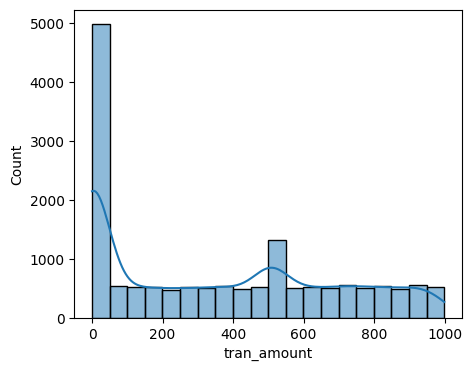

In [123]:
plt.rcParams['figure.figsize']=[5,4]  
sns.histplot(df_txn_grpd['tran_amount'],kde=True)
plt.show()

In [124]:
median_to_replace = round(df_txn_grpd[df_txn_grpd['tran_amount']>0]['tran_amount'].median(),2)
median_to_replace

508.49

In [125]:
df_txn_3 = df_txn_2.copy()

In [126]:
df_txn_3['tran_amount'].replace(0,median_to_replace,inplace=True)

Replaced zero transaction amounts with the median value of transactions for the 'Electronics - Amazon - Credit Card' category combination, as all zero values belonged to this specific group.

**Visualization**

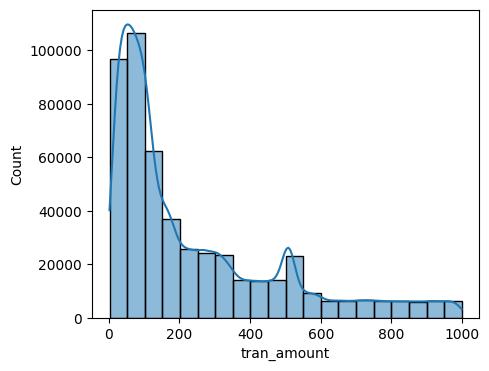

In [127]:
sns.histplot(df_txn_3['tran_amount'],kde=1,bins=20)
plt.show()

In [128]:
df_txn_3.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,amount_bins
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe,"(0, 1000]"
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card,"(0, 1000]"
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe,"(0, 1000]"
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay,"(0, 1000]"
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking,"(0, 1000]"


In [129]:
sorted_order = df_txn_3['payment_type'].value_counts().sort_values(ascending=False).index
sorted_order

Index(['Phonepe', 'Credit Card', 'Gpay', 'Debit Card', 'Net Banking', 'Cash'], dtype='object', name='payment_type')

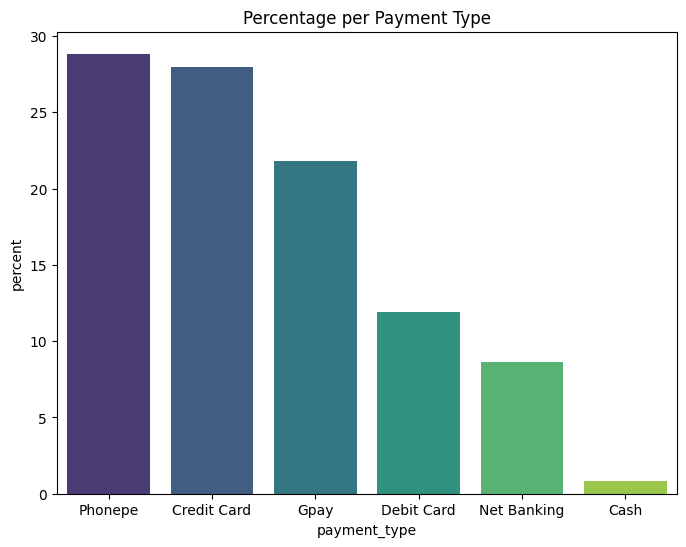

In [130]:
plt.rcParams['figure.figsize']=[8,6] 
sns.countplot(x=df_txn_3['payment_type'], palette='viridis',stat='percent',order=sorted_order)
plt.title('Percentage per Payment Type')
plt.show()

In [131]:
df_merged

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married,26-48,564,0.702963,688.0,2.0,1250.0,550-599
996,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,49-65,774,0.465462,17139.0,0.0,60000.0,750-799
997,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,26-48,529,0.585856,386.0,3.0,1000.0,500-549
998,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married,26-48,725,0.249670,6973.0,2.0,40000.0,700-749


In [132]:
df_merged1=pd.merge(df_merged,df_txn_3,on='cust_id',how='inner')

In [133]:
df_merged1.shape

(500000, 22)

In [134]:
pd.set_option('display.max_columns',None)

In [135]:
df_merged1.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,tran_id,tran_date,tran_amount,platform,product_category,payment_type,amount_bins
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking,"(0, 1000]"
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,1382,2023-01-01,96.0,Amazon,Sports,Debit Card,"(0, 1000]"
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay,"(0, 1000]"
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe,"(0, 1000]"
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card,"(0, 1000]"


**Feature Distribution Across Age Groups**

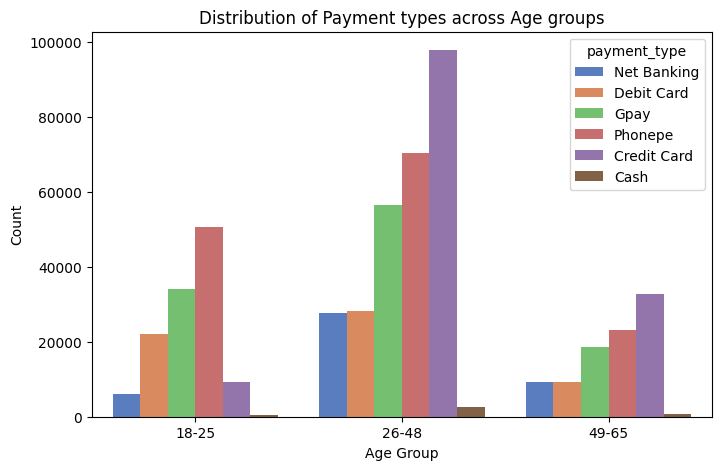

In [136]:
plt.rcParams['figure.figsize']=[8,5] 
sns.countplot(x='age_group',hue='payment_type',data=df_merged1,palette='muted')
plt.title('Distribution of Payment types across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [137]:
credit_card_df = df_merged1[df_merged1['payment_type'] == 'Credit Card']

In [138]:
sorted_counts = credit_card_df['age_group'].value_counts().sort_values(ascending=True)

In [139]:
sorted_order = sorted_counts.index.tolist()

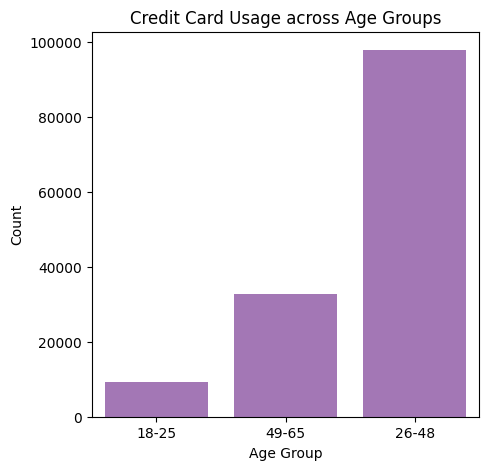

In [140]:
plt.rcParams['figure.figsize'] = [5, 5]
sns.countplot(x='age_group', data=credit_card_df, order=sorted_order,color='#a76dbf')
plt.title('Credit Card Usage across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

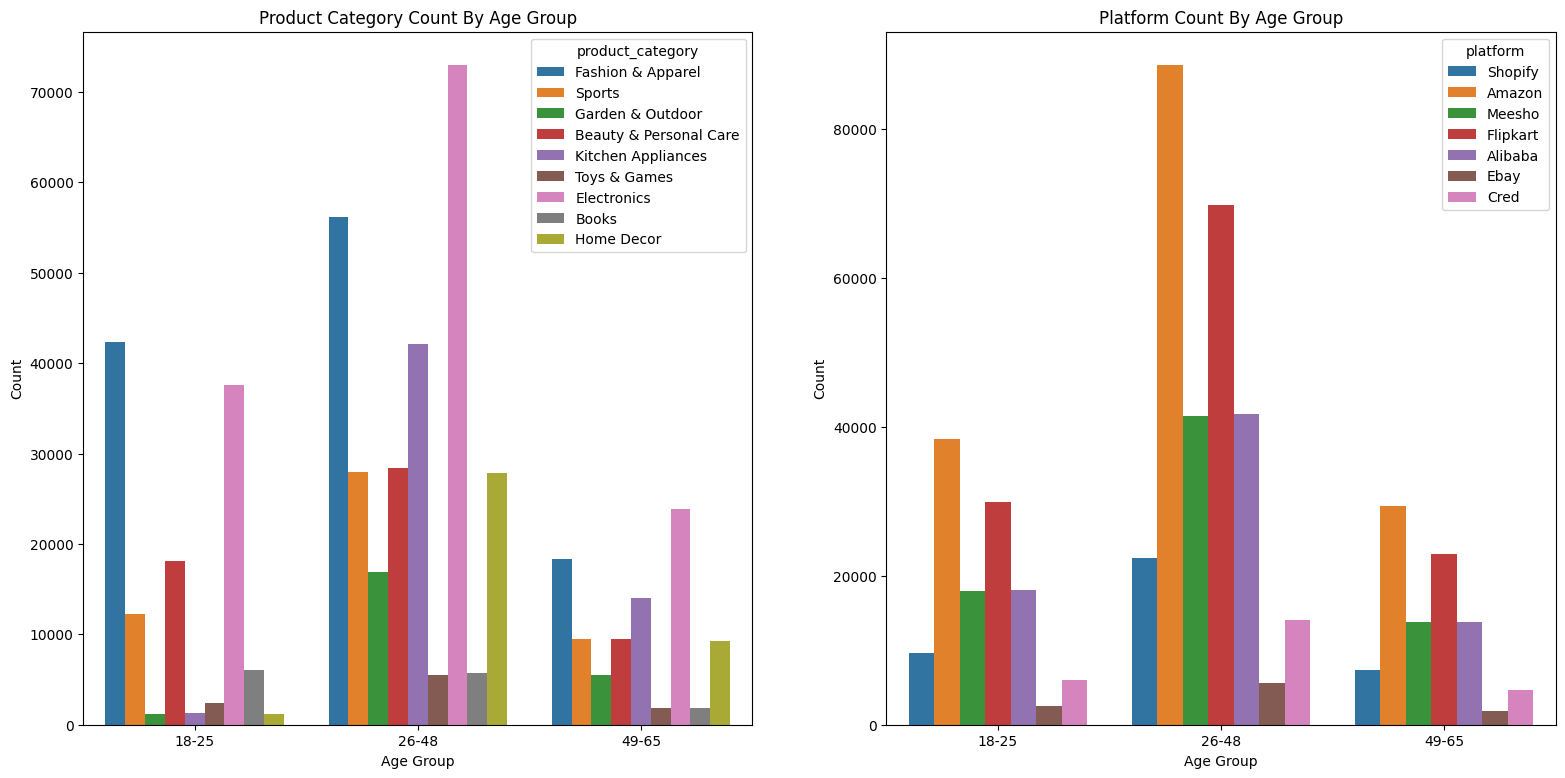

In [141]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(19,9))

sns.countplot(x='age_group', hue='product_category', data=df_merged1, ax=ax1)
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")

sns.countplot(x='age_group', hue='platform', data=df_merged1, ax=ax2)
ax2.set_title("Platform Count By Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
plt.show()

**Average Transaction Amount Across Attributes**

In [142]:
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

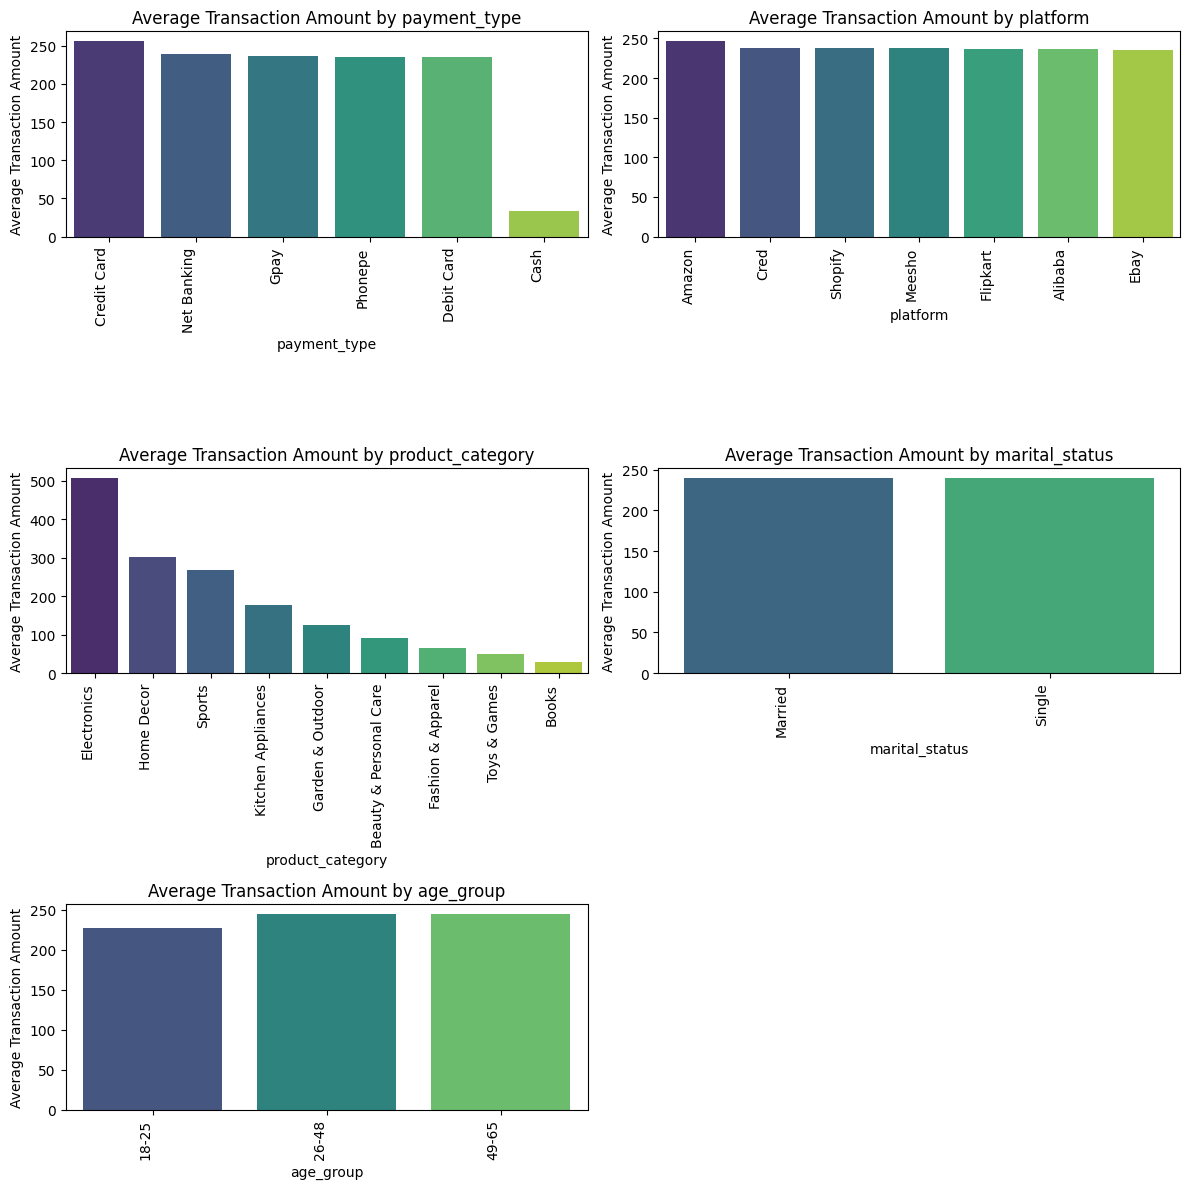

In [143]:
plt.rcParams['figure.figsize']=[12,12]
for i,col in enumerate(cat_cols,1):
    plt.subplot(3,2,i)
    avg_tran_amount_by_category = df_merged1.groupby(col)['tran_amount'].mean().reset_index()
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    sns.barplot(x=col, y='tran_amount', data=sorted_data, ci=None, palette='viridis')
    plt.title(f'Average Transaction Amount by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Transaction Amount')
    plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [144]:
df_txn_3.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,240.219418
std,144337.711635,288.641924,241.152313
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,64.553463
50%,250000.500000,502.000000,133.000000
75%,375000.250000,752.000000,349.000000
max,500000.000000,1000.000000,999.000000


**Further Analysis On Age Group**


In [145]:
attributes = ['annual_income', 'credit_limit', 'credit_score']

In [146]:
age_group_metrics = (
    df_merged1.groupby('age_group')[attributes]
    .mean()
    .round() 
    .reset_index()  
    .astype(int, errors='ignore')
)

In [147]:
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,37138,1137,485
1,26-48,146093,20610,598
2,49-65,260431,41782,702


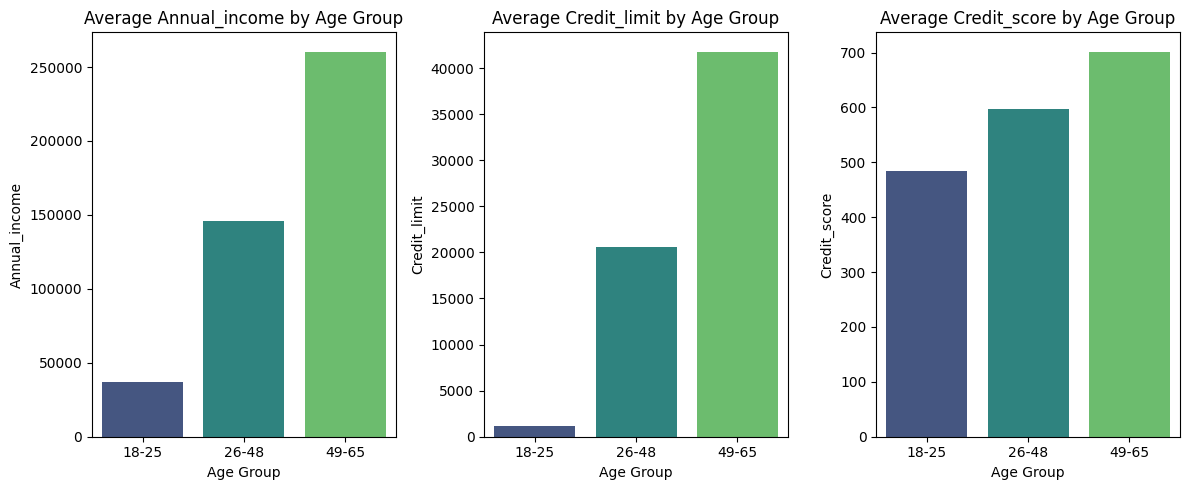

In [148]:
plt.rcParams['figure.figsize'] = [12,5]
for i, col in enumerate(attributes, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x='age_group', y=col, data=df_merged1, palette='viridis',ci=False)
    plt.title(f'Average {col.capitalize()} by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel(col.capitalize())
plt.tight_layout()
plt.show()

In [149]:
data=df_merged1.groupby('age_group')['tran_amount'].mean().sort_values(ascending=True)
data

age_group
18-25    227.549765
49-65    244.056894
26-48    244.426661
Name: tran_amount, dtype: float64

In [150]:
df_merged1.to_csv('merged_cleaned.csv')

<h3 align="center" style="font-weight:bold">Finalize Target Market For a Trial Credit Card Launch</h3>

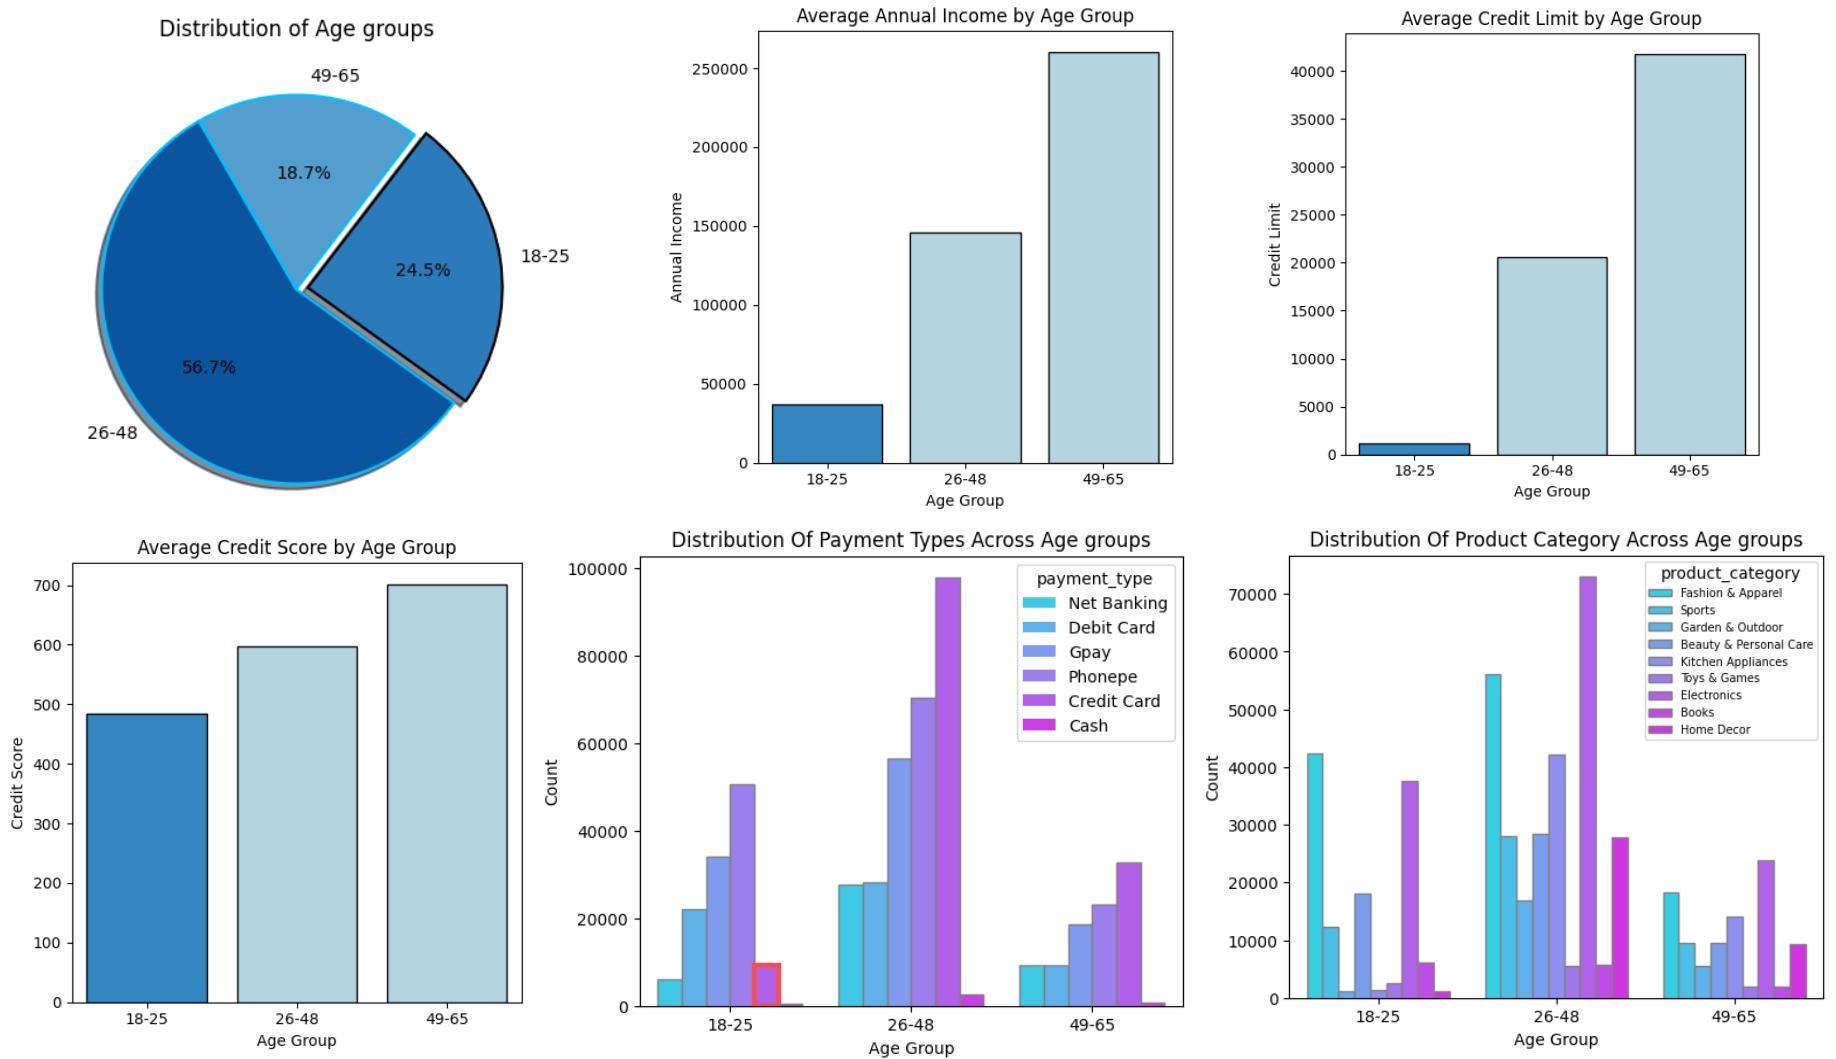

### **Targeting Untapped market**

1. People with age group of 18-25 accounts to ~25% of customer base in the data.
2. Avg annual income of this age group is less than 50k.
3. This group typically has lower credit scores and limits, reflecting their early stage in credit development.
4. Credit cards are used less frequently by this segment compared to older age groups.
5. However, they show strong interest in Electronics, Fashion & Apparel, and Beauty & Personal Care — categories that present an opportunity for targeted promotions like discounts or cashback to boost card adoption.
6. In contrast, older segments (26–48, 49–65) already exhibit high credit card usage. The 49–65 group in particular tends to stick with familiar cards, making it harder to influence with new offerings.




---